# Instructions

## Dataset and Goal

The Sarcasm on Reddit dataset provides comments posted on Reddit labeled as sarcastic (1) or not sarcastic (0). The task of the project is, given only the parent comment and the Reddit category (subreddit), to predict the probability of a parent comment to receive a sarcastic comment.

  

## Evaluation strategy

Cross-validation.

## Dataset

[Sarcasm on Reddit](https://www.kaggle.com/danofer/sarcasm)

## References

[Khodak, M., Saunshi, N., & Vodrahalli, K. (2017). A large self-annotated corpus for sarcasm](https://arxiv.org/abs/1704.05579)

[Eke, C. I., Norman, A. A., Shuib, L., & Nweke, H. F. (2019). Sarcasm identification in textual data: systematic review, research challenges and open directions. Artificial Intelligence Review, 1-44](https://link.springer.com/article/10.1007/s10462-019-09791-8)

[Joshi, A., Bhattacharyya, P., & Carman, M. J. (2017). Automatic sarcasm detection: A survey. ACM Computing Surveys (CSUR), 50(5), 1-22](https://dl.acm.org/doi/abs/10.1145/3124420)

# Project

## Import Dataset

In [64]:
import time         # calculate running time
import os           # access directory structure
import pandas as pd # data processing

open all files

In [65]:
for dirname, _, filenames in os.walk('C:/Users/User/Desktop/university/text mining/ferrara/project/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/User/Desktop/university/text mining/ferrara/project/dataset\test-balanced.csv
C:/Users/User/Desktop/university/text mining/ferrara/project/dataset\test-unbalanced.csv
C:/Users/User/Desktop/university/text mining/ferrara/project/dataset\train-balanced-sarc.csv.gz
C:/Users/User/Desktop/university/text mining/ferrara/project/dataset\train-balanced-sarcasm.csv


train-balanced-sarcasm.csv file

In [72]:
number_of_rows_to_read = None # 'None' to read the whole file in script
df_data = pd.read_csv('C:/Users/User/Desktop/university/text mining/ferrara/project/dataset/train-balanced-sarcasm.csv', delimiter=',', nrows = number_of_rows_to_read)
df_data.name = 'train-balanced-sarcasm.csv'
df_data.number_of_rows, df_data.number_of_cols = df_data.shape

print(f'There are {df_data.number_of_rows} rows and {df_data.number_of_cols} columns')

There are 1010826 rows and 10 columns


In [104]:
#df_data.info()
df_data.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


test-unbalanced.csv file

In [76]:
number_of_rows_to_read = None # 'None' to read the whole file in script
df_test_unbal = pd.read_csv('C:/Users/User/Desktop/university/text mining/ferrara/project/dataset/test-unbalanced.csv', delimiter=',', nrows = number_of_rows_to_read)
df_test_unbal.name = 'test-unbalanced.csv'
df_test_unbal.number_of_rows, df_test_unbal.number_of_cols = df_test_unbal.shape

print(f'There are {df_test_unbal.number_of_rows} rows and {df_test_unbal.number_of_cols} columns')

There are 63997 rows and 3 columns


In [80]:
df_test_unbal.info()
df_test_unbal.describe()
df_test_unbal.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63997 entries, 0 to 63996
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   7u1ht    63997 non-null  object
 1   c07em3g  63997 non-null  object
 2   1        63997 non-null  object
dtypes: object(3)
memory usage: 1.5+ MB


,7u1ht,c07em3g,1
0,7u92p,c07f8sq c07flil c07fgh5 c07f9ck c07fn0s c07fl0...,0 0 0 0 0 0 0 0 0 0 0
1,7vvpw,c07khcb c07jx0k c07jzxi c07k0t3 c07jx2j,0 0 0 0 0
2,7vv27 c07ju7y,c07jub3,1
3,7wco4,c07l718 c07lfcd c07l7zu,0 0 0
4,7xgdr,c07o9qu,1


test-balanced.csv file

In [78]:
number_of_rows_to_read = None # 'None' to read the whole file in script
df_test_bal = pd.read_csv('C:/Users/User/Desktop/university/text mining/ferrara/project/dataset/test-balanced.csv', delimiter=',', nrows = nRowsRead)
df_test_bal.name = 'test-unbalanced.csv'
df_test_bal.number_of_rows, df_test_bal.number_of_cols = df_test_bal.shape

print(f'There are {df_test_bal.number_of_rows} rows and {df_test_bal.number_of_cols} columns')

There are 32332 rows and 3 columns


In [79]:
df_test_bal.info()
df_test_unbal.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32332 entries, 0 to 32331
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   7x7dx            32332 non-null  object
 1   c07nkao c07nk63  32332 non-null  object
 2   1 0              32332 non-null  object
dtypes: object(3)
memory usage: 757.9+ KB


,7u1ht,c07em3g,1
0,7u92p,c07f8sq c07flil c07fgh5 c07f9ck c07fn0s c07fl0...,0 0 0 0 0 0 0 0 0 0 0
1,7vvpw,c07khcb c07jx0k c07jzxi c07k0t3 c07jx2j,0 0 0 0 0
2,7vv27 c07ju7y,c07jub3,1
3,7wco4,c07l718 c07lfcd c07l7zu,0 0 0
4,7xgdr,c07o9qu,1


## Data Cleaning

drop NaNs tuples

In [14]:
df_data.isna().sum(axis=0)

label              0
comment           53
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

In [81]:
na_comments = df_data["comment"].isna()
na_comments = df_data[na_comments].index
df_data.drop(   labels = na_comments,   # Index or column labels to drop.
                axis = 0,               # Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).
                inplace = True)         # If False, return a copy. Otherwise, do operation inplace and return None.

check validity of ups and downs attributes

In [82]:
df_data.describe()

,label,score,ups,downs
count,1.010773e+06,1.010773e+06,1.010773e+06,1.010773e+06
mean,4.999817e-01,6.885999e+00,5.499140e+00,-1.458686e-01
std,5.000002e-01,4.834411e+01,4.127402e+01,3.529746e-01
min,0.000000e+00,-5.070000e+02,-5.070000e+02,-1.000000e+00
25%,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00
75%,1.000000e+00,4.000000e+00,3.000000e+00,0.000000e+00
max,1.000000e+00,9.070000e+03,5.163000e+03,0.000000e+00


In [17]:
value_counts_downs = df_data["downs"].value_counts()
value_counts_downs

 0    863333
-1    147440
Name: downs, dtype: int64

In [18]:
value_count_ups = df_data["ups"].value_counts()
value_count_ups

 1       289577
-1       168042
 2       138984
 3        76593
 0        51848
          ...  
 2813         1
 764          1
-261          1
 762          1
 760          1
Name: ups, Length: 1171, dtype: int64

In [19]:
negative_ups = sum(df_data["ups"] < 0)
negative_ups

209162

## Data Exploration

percentual distribution of sarcastic and non-sarcastic comments by score

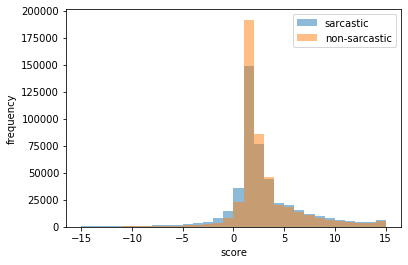

In [20]:
import matplotlib.pyplot as plt

score_sarcastic = df_data["score"][df_data["label"] == 1]
score_not_sarcastic = df_data["score"][df_data["label"] == 0]
bins = list(range(-15, 16)) # set number of bins in graph
plt.hist(score_sarcastic, bins = bins, alpha = 0.5, label = "sarcastic")
plt.hist(score_not_sarcastic, bins = bins, alpha = 0.5, label = "non-sarcastic")
plt.xlabel("score")
plt.ylabel("frequency")
plt.legend(loc = "upper right") # position of legend

plt.savefig('sarcasm_distribution_by_score.png', bbox_inches = 'tight', pad_inches = 0.15) # savefig() before show()

plt.show()

percentual count distribution of sarcastic parent-comments by month

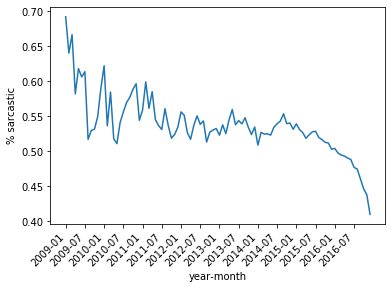

In [33]:
df_data_by_month = df_data.groupby("date").agg({"label" : "mean", "parent_comment" : "count"}) # group
months = list(df_data_by_month.index)
label_pos = list(range(0, len(months), 6))
m_labels = [months[i] for i in label_pos]

plt.plot(months, df_data_by_month["label"])
plt.xlabel("year-month")
plt.ylabel("% sarcastic")
plt.xticks(label_pos, m_labels, rotation=45, ha="right")

plt.savefig('sarcasm_distribution_by_year_month.png', bbox_inches = 'tight', pad_inches = 0.15) # savefig() before show()

plt.show()

number of parent comments by month

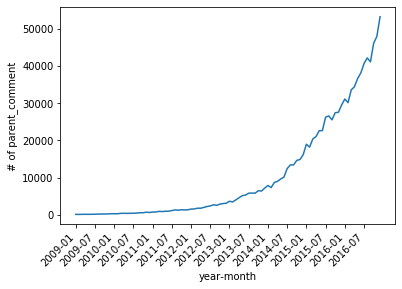

In [85]:
months = list(df_data_by_month.index)               # sorted list of months in df_data
label_position = list(range(0, len(months), 6))     # list of position of labels with monthly frame
month_labels = [months[i] for i in label_position]  # list of moth labels 

plt.plot(months, df_data_by_month["parent_comment"])
plt.xlabel("year-month")
plt.ylabel("# of parent_comment")
plt.xticks( ticks = label_position, # The list of xtick locations
            labels = month_labels,  # The labels to place at the given ticks locations
            rotation = 45,          # Rotation of labels displayed
            ha = "right")           # Direction of rotation

plt.savefig('commentnumber_distribution_by_year_month.png', bbox_inches = 'tight', pad_inches = 0.15) # savefig() before show()

plt.show()

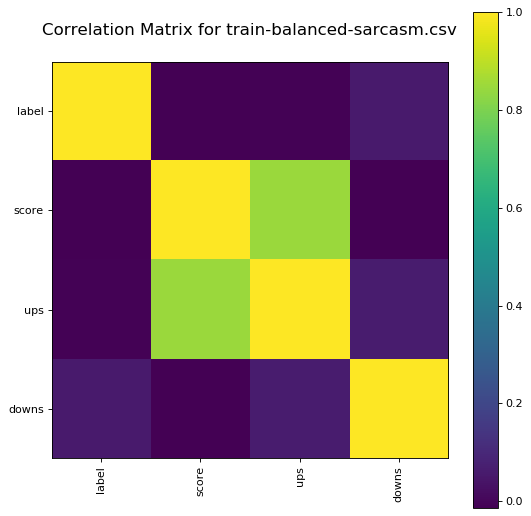

In [89]:
import matplotlib.pyplot as plt

def plot_correlation_matrix(df, graph_width):
    _filename = df.name
    _df = df.dropna('columns') # handle columns with NaN values
    _df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    
    # error handling 
    if _df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({_df.shape[1]}) is less than 2')
        return
    
    _corr = _df.corr()
    
    plt.figure( num = None, 
                figsize = (graph_width, graph_width), 
                dpi = 80, 
                facecolor = 'w', 
                edgecolor ='k')

    _correlation_matrix = plt.matshow(_corr, fignum = 1)
    plt.xticks(range(len(_corr.columns)), _corr.columns, rotation=90)
    plt.yticks(range(len(_corr.columns)), _corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(_correlation_matrix)
    plt.title(f'Correlation Matrix for {_filename}', fontsize=15)
    plt.show()
    
plot_correlation_matrix(df_data, 8)

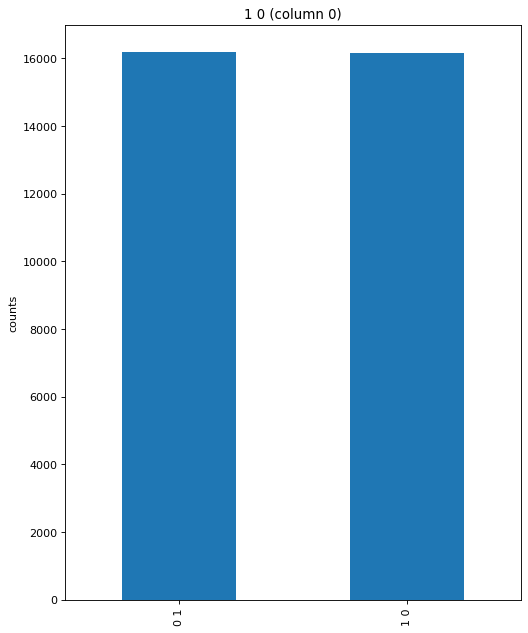

In [97]:
import numpy as np

# Distribution graphs (histogram/bar graph) of column data
def plot_per_column_distribution(df, number_of_graphs_shown, number_of_graph_per_rows, filename):
    nunique = df.nunique() # Count distinct observations over requested axis
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # pick columns that have between 1 and 50 unique values
    _number_of_rows, _number_of_cols = df.shape
    _column_names = list(df)
    _number_of_graph_rows = (_number_of_cols + number_of_graph_per_rows - 1) / number_of_graph_per_rows
    plt.figure(num = None, figsize = (6 * number_of_graph_per_rows, 8 * _number_of_graph_rows), dpi = 80, facecolor = 'w', edgecolor = 'k')
    
    for i in range(min(_number_of_cols, number_of_graphs_shown)):
        plt.subplot(_number_of_graph_rows, number_of_graph_per_rows, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{_column_names[i]} (column {i})')
    
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    
    # save image
    plt.savefig(filename + ".png", 
                bbox_inches = 'tight', 
                pad_inches = 0.15) # savefig() before show()
    # show image
    plt.show()

plot_per_column_distribution(df_test_bal, 10, 5, "df_test_bal_count_barplot")

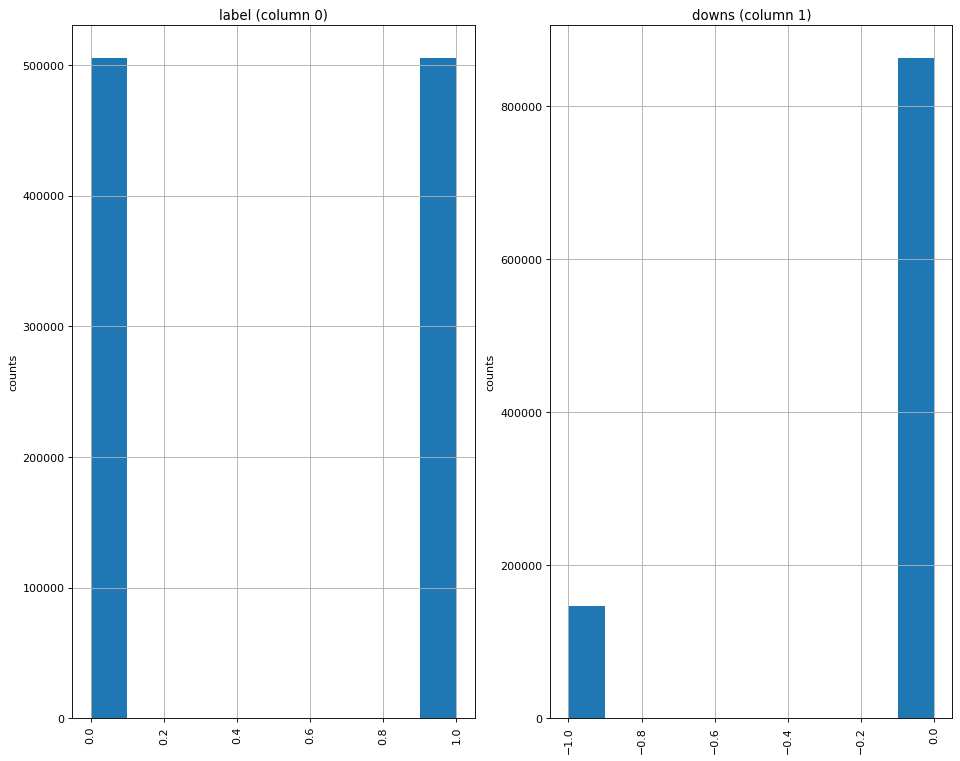

In [99]:
plot_per_column_distribution(df_data, 10, 5, filename = 'plot_per_column_distribution_df_data')

scatter and density plot

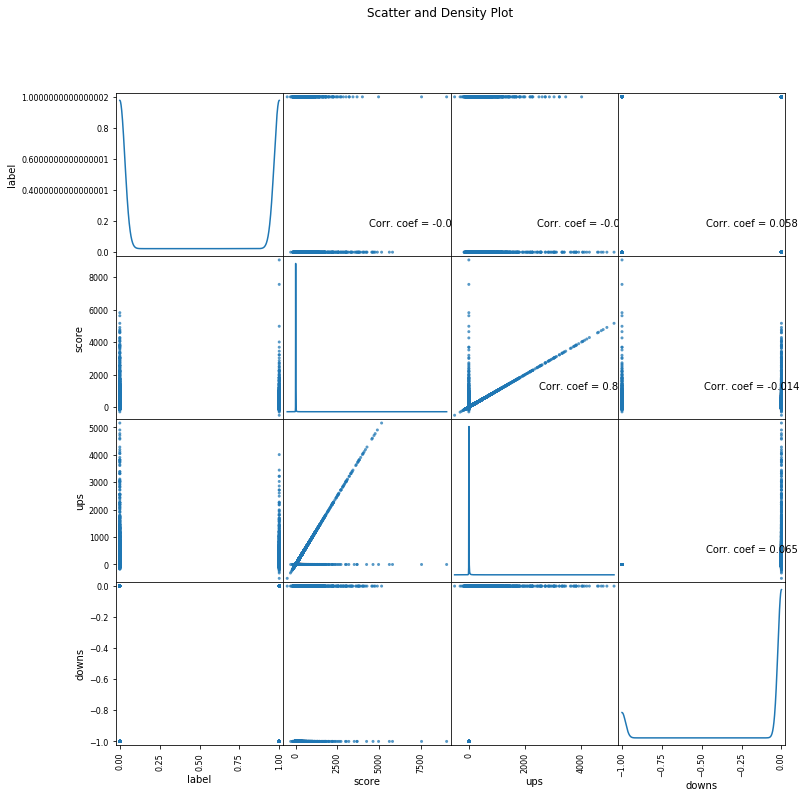

Execution time in seconds: 457.55094146728516


In [102]:
def plot_scatter_matrix(df, plot_size, text_size):
    df = df.select_dtypes(include = [np.number]) # keep only numerical columns
    
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    _column_names = list(df)
    
    if len(_column_names) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        _column_names = _column_names[:10]
    df = df[_column_names]
    ax = pd.plotting.scatter_matrix(df, alpha = 0.75, figsize = [plot_size, plot_size], diagonal = 'kde')
    corrs = df.corr().values
    
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords = 'axes fraction', ha = 'center', va = 'center', size = text_size)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

start_time = time.time()

plot_scatter_matrix(df_data, 12, 10) # warning: slow

execution_time = (time.time() - start_time)

print('Execution time in seconds: ' + str(execution_time))

## Train/Validation Split

In [108]:
df_model = df_data[['parent_comment', 'subreddit', 'label']]
df_model.head()

,parent_comment,subreddit,label
0,"Yeah, I get that argument. At this point, I'd ...",politics,0
1,The blazers and Mavericks (The wests 5 and 6 s...,nba,0
2,They're favored to win.,nfl,0
3,deadass don't kill my buzz,BlackPeopleTwitter,0
4,Yep can confirm I saw the tool they use for th...,MaddenUltimateTeam,0


In [109]:
from sklearn.model_selection import train_test_split

train_data, validation_data = train_test_split( df_data, 
                                                test_size = 0.25, 
                                                random_state = 123) # shuffling applied to the data before applying the split
validation_data.shape

(252694, 10)

## Model

In [113]:
train_comments = df_model['parent_comment']
train_comments.head()

0    Yeah, I get that argument. At this point, I'd ...
1    The blazers and Mavericks (The wests 5 and 6 s...
2                              They're favored to win.
3                           deadass don't kill my buzz
4    Yep can confirm I saw the tool they use for th...
Name: parent_comment, dtype: object

In [114]:
train_subreddit = df_model['subreddit']
train_subreddit.head()

0              politics
1                   nba
2                   nfl
3    BlackPeopleTwitter
4    MaddenUltimateTeam
Name: subreddit, dtype: object

In [115]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

In [116]:
from nltk.corpus import stopwords
stop_words_en = stopwords.words("english")

In [117]:
vect = CountVectorizer(max_features = 20000)
train_bow = vect.fit_transform(train_comments)
train_bow.shape

(1010773, 20000)

In [45]:
tfidf_trans_normalized = TfidfTransformer()
train_tfidf = tfidf_trans_normalized.fit_transform(train_bow)
train_tfidf.shape

(758079, 20000)

In [118]:
token_count_matrix = CountVectorizer(   strip_accents = 'unicode', 
                                        stop_words = stop_words_en, 
                                        min_df = 0.0001, 
                                        max_df = 0.70)
train_bow = token_count_matrix.fit_transform(train_comments)
train_bow.shape

(1010773, 11081)

In [49]:
from sklearn.model_selection import GridSearchCV, cross_validate

### Logistic Regression

make a classifier using Logistic Regresssion only for comment attribute with a Bag of Words

In [69]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

log_reg_model = LogisticRegression(random_state = 123)
cross_validate(log_reg_model, train_bow, train_data["label"], cv = 2, scoring = "accuracy", n_jobs =- 1)

{'fit_time': array([7.87881994, 7.88181353]),
 'score_time': array([0.12865686, 0.1266613 ]),
 'test_score': array([0.68788782, 0.68677102])}

In [72]:
# recreate the vectorizer and transformer so they are not fit yet
#token_count_matrix = CountVectorizer(strip_accents = 'unicode', stop_words = stop_words_en, min_df = 0.0001, max_df = 0.70)
#tfidf_trans_normalized = TfidfTransformer()

# create the model
log_reg_model = LogisticRegression(random_state = 42, penalty = "elasticnet", solver = "saga")

pipeline = Pipeline([
    ('vect', token_count_matrix),
    ('tftrans', tfidf_trans_normalized),
    ('model', log_reg_model)
])

In [ ]:
start_time = time.time()

param_grid = {
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'vect__max_features': (5000, 15000, 30000),
    'model__l1_ratio': (0.0, 0.25, 0.50, 0.75, 1.0)
}

grid_logreg = GridSearchCV(pipeline, param_grid, scoring = "accuracy", cv = 2, n_jobs =- 1)
grid_logreg.fit(train_comments, train_data["label"])

print("--- %s seconds ---" % (time.time() - start_time)) #too long on local

In [53]:
#print(grid_logreg.best_score_)
#for param_name in sorted(param_grid.keys()):
#    print("%s: %r" % (param_name, grid_logreg.best_params_[param_name]))
print(grid_logreg.__dict__)

{'scoring': 'accuracy', 'estimator': Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.7,
                                 max_features=None, min_df=0.0001,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you...
                ('tftrans',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
        

### Naive Bayes

In [47]:
from sklearn.naive_bayes import MultinomialNB

vect = CountVectorizer(strip_accents='unicode', stop_words = stop_words_en, min_df = 0.0001, max_df = 0.70)
tf_trans = TfidfTransformer()

# create the NB model
nb_model = MultinomialNB()

pipeline = Pipeline([
    ('vect', token_count_matrix),
    ('tftrans', tfidf_trans_normalized),
    ('model', nb_model)
])

In [50]:
param_grid = {
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'vect__max_features': (5000, 15000, 30000)
}

grid_nb = GridSearchCV(pipeline, param_grid, scoring = "accuracy", cv = 2, n_jobs =- 1)
grid_nb.fit(train_comments, train_data["label"])

KeyboardInterrupt: 

In [64]:
print(grid_nb.best_score_)
for param_name in sorted(param_grid.keys()):
    print("%s: %r" % (param_name, grid_nb.best_params_[param_name]))

0.6681282553980065
vect__max_features: 15000
vect__ngram_range: (1, 3)


### Support Vector Machine

In [65]:
# recreate the vectorizer and transformer so they are not fit yet
vect = CountVectorizer(strip_accents = 'unicode', stop_words = stop_words_en, min_df = 0.0001, max_df = 0.70)
tfidf_trans_normalized = TfidfTransformer()

# create the SVM model
svm_model = SGDClassifier(penalty = "elasticnet", random_state = 42, n_jobs =- 1)

pipeline = Pipeline([
    ('vect', token_count_matrix),
    ('tftrans', tfidf_trans_normalized),
    ('model', svm_model)
])

In [66]:
param_grid = {
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'vect__max_features': (5000, 15000, 30000),
    'model__l1_ratio': (0.0, 0.15, 0.40, 0.60, 0.85, 1.0)
}

grid_svm = GridSearchCV(pipeline, param_grid, scoring = "accuracy", cv = 2, n_jobs =- 1)
grid_svm.fit(train_comments, train_data["label"])

GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=0.7,
                                                        max_features=None,
                                                        min_df=0.0001,
                                                        ngram_range=(1, 1),
                                                       

In [67]:
print(grid_svm.best_score_)
for param_name in sorted(param_grid.keys()):
    print("%s: %r" % (param_name, grid_svm.best_params_[param_name]))

0.6564606054568923
model__l1_ratio: 0.0
vect__max_features: 15000
vect__ngram_range: (1, 3)
